In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import os
os.chdir("../")

import get_data as gd

columns = ['id', 'cpu', 'memory', 'storage', 'bandwidth']
topology = 'synthetic'


In [3]:
# Função para obter os dados da topologia
def get_data_nodes():
    df_nodes, df_edges = gd.get_topology(topology, capacity_percent=1.0)
    G = gd.create_graph_topology(df_nodes, df_edges)
    return df_nodes[columns], df_edges, G

# Carregar a topologia
nodes, edges, G = get_data_nodes()

# Obter posições dos nós
pos = nx.get_node_attributes(G, 'pos')

In [6]:
def plot_other(mirror_axis=None):
    """
    Plota a topologia da rede Germany sem rotação.
    
    Parâmetros:
        G: networkx.Graph() - Grafo da topologia
        topology: str - Nome da topologia (para título e salvamento)
        mirror_axis: str - Define o eixo de espelhamento ('x', 'y', 'both' ou None)
    """
    # Configuração do tamanho do gráfico
    plt.style.use('seaborn-v0_8-whitegrid')
    fig = plt.figure(figsize=(12, 12), dpi=60)

    # Obter a posição original dos nós
    pos = nx.get_node_attributes(G, 'pos')

    # Aplicar espelhamento, se necessário
    if mirror_axis == 'x':
        mirrored_pos = {node: (x, -y) for node, (x, y) in pos.items()}
    elif mirror_axis == 'y':
        mirrored_pos = {node: (-x, y) for node, (x, y) in pos.items()}
    elif mirror_axis == 'both':
        mirrored_pos = {node: (-x, -y) for node, (x, y) in pos.items()}
    else:
        mirrored_pos = pos  # Sem espelhamento

    # Configuração de cores e estilos
    node_color = 'deepskyblue'
    node_border_color = 'black'
    edge_color = 'gray'
    font_color = 'black'
    font_size = 10
    edge_label_font_size = 8
    node_size = 400

    # Desenhar arestas com baixa opacidade
    nx.draw_networkx_edges(G, mirrored_pos, edge_color=edge_color, alpha=0.7, width=1.5)

    # Desenhar nós
    nx.draw_networkx_nodes(G, mirrored_pos, node_size=node_size, node_color=node_color, edgecolors=node_border_color, linewidths=1.5)

    # Adicionar rótulos dos nós
    nx.draw_networkx_labels(G, mirrored_pos, font_color=font_color, font_size=font_size)

    # Adicionar título
    plt.title(f'Topology {topology}', fontsize=16, fontweight='bold', pad=20)

    # Adicionar grade discreta
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Ajustar layout
    plt.tight_layout()

    plt.savefig(f'graphs/plots/graph_of_{topology}_topology.svg', format='svg', bbox_inches='tight')

    # Exibir o gráfico
    plt.show()

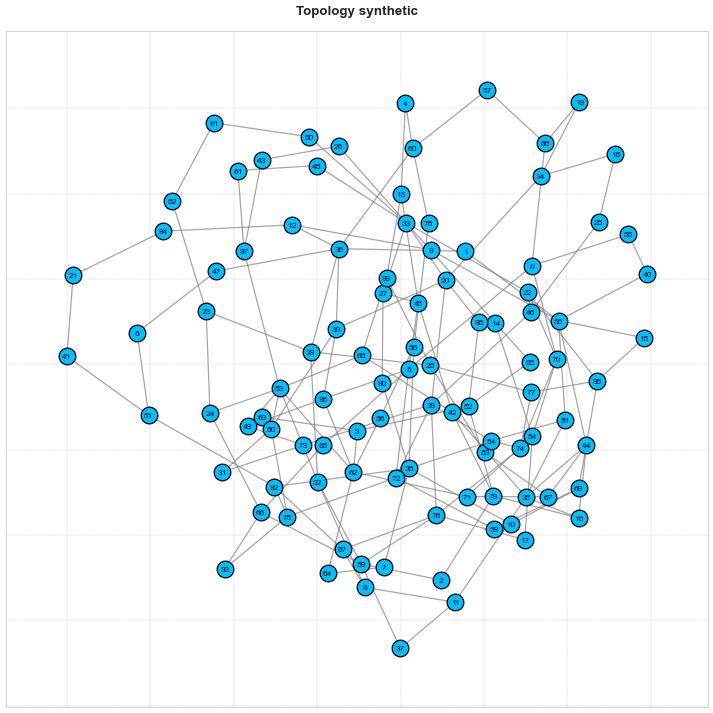

In [7]:
if topology == 'germany':
    plot_other(mirror_axis='None')
else:
    plot_other(mirror_axis='None')

In [9]:
nodes.describe()

,id,cpu,memory,storage,bandwidth
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,521.694394,502.221684,221.612272,102.836263
std,29.011492,291.513317,307.202234,55.341257,29.262560
min,0.000000,2.844184,7.928373,52.867334,29.001926
25%,24.750000,330.505045,225.526838,184.846489,80.532428
50%,49.500000,491.298171,518.427007,223.286342,100.960141
75%,74.250000,683.890514,667.898843,254.254135,121.939498
max,99.000000,1206.590791,1386.184973,414.941491,171.779513
